# Taylor Imhof
# Bellevue University | DSC 680
# Project One Notebook

In [1]:
# import required libraries
import pandas as pd
import numpy as np

# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# model training packages
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Loading the Cars Dataset

In [2]:
# read in cars data to pandas dataframe
df = pd.read_csv('data/cars.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# view general dataset info
df.shape

(205, 26)

In [4]:
# view summary stats of the dataset
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


This dataset is quite small, containing just over 200 observations with 26 features

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

There appears to be a decent amount of both continuous and categorical variables that will be useful when training the prediction model. Based on some of the data types, there are some features that need to be converted to proper format for analysis purposes.

Time to take a deeper look at the data to see if any underlying trends can be uncovered

## Data Cleaning

In [6]:
# extract the first word from the car name feature
make = df['CarName'].apply(lambda x: x.split(' ')[0])

# insert new manufacturer into dataframe
df.insert(3, 'make', make)

# drop now redundant carname column from dataframe
# also drop other columns that are not useful like id and symboling columns
df.drop(columns=['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)
df.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# check how many unique manufacturers are contained in the dataset
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There appear to be some typos in the dataset where the person encoding the data likely made a mistake during data entry.

To fix this, we will use a simply utility function to replace the typos with the correct spelling

In [8]:
# utility function that takes typo and replaces with correct spelling
def fix_typos(a, b):
    df.make.replace(a, b, inplace=True)

In [9]:
# normalize all make name by making them lowercase
df.make = df.make.str.lower()

# call fix typos function on all erroneous make names
fix_typos('maxda','mazda')
fix_typos('porcshce','porsche')
fix_typos('toyouta','toyota')
fix_typos('vokswagen','volkswagen')
fix_typos('vw','volkswagen')

In [10]:
# view unique values again to ensure there are no other typos
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
df.dtypes

make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [12]:
# check for missing values
df.isnull().sum()

make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().value_counts()

False    205
dtype: int64

Fortunately, for this dataset there does not appear to be any missing values

## Data Visualization

The first data point that I feel would be interesting to zone in on is the target or the price point that the cars have been sold at.

This feature is captured in the `price` column

C:\Users\taylo\anaconda3\envs\dsc650\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


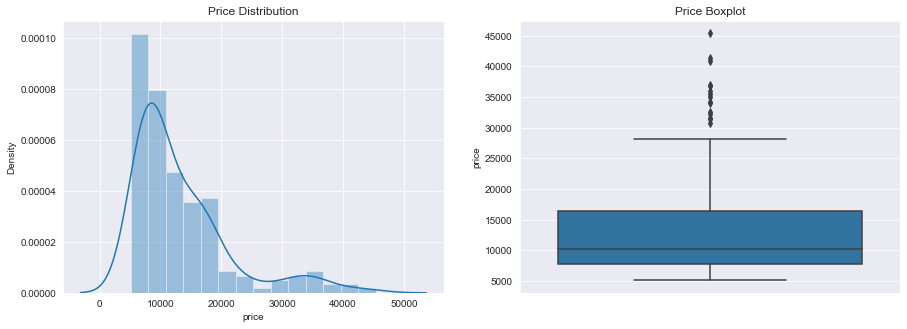

In [14]:
#
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Price Distribution')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Price Boxplot')
sns.boxplot(y=df.price)

plt.show()

Based off the distribution plot of the `price` target column, the prices do appear to have a slight positive skew.

Looking at the boxplot, there do appear to be quite a few outliers on the high end, so perhaps performing a logarithmic transformation would be beneficial.

In [15]:
# create log transformation column on target column price
df.log_price = np.log1p(df.price)
df.log_price.head()

C:\Users\taylo\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


0    9.510149
1    9.711176
2    9.711176
3    9.543306
4    9.767152
Name: price, dtype: float64

C:\Users\taylo\anaconda3\envs\dsc650\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


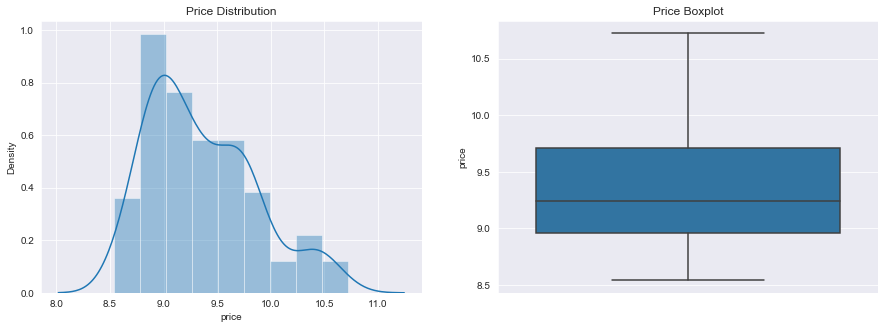

In [16]:
# re-plot dist and boxplot to see effects of log transformation
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Price Distribution')
sns.distplot(df.log_price)

plt.subplot(1,2,2)
plt.title('Price Boxplot')
sns.boxplot(y=df.log_price)

plt.show()

After performing the log transformation, the target data does appear to be more normally distributed, and the boxplot indicates that there are nearly zero outliers.

I plan on training the model using both with and without a transformed target to see if there are any effects to prediction performance.

#### Correlation Matrix

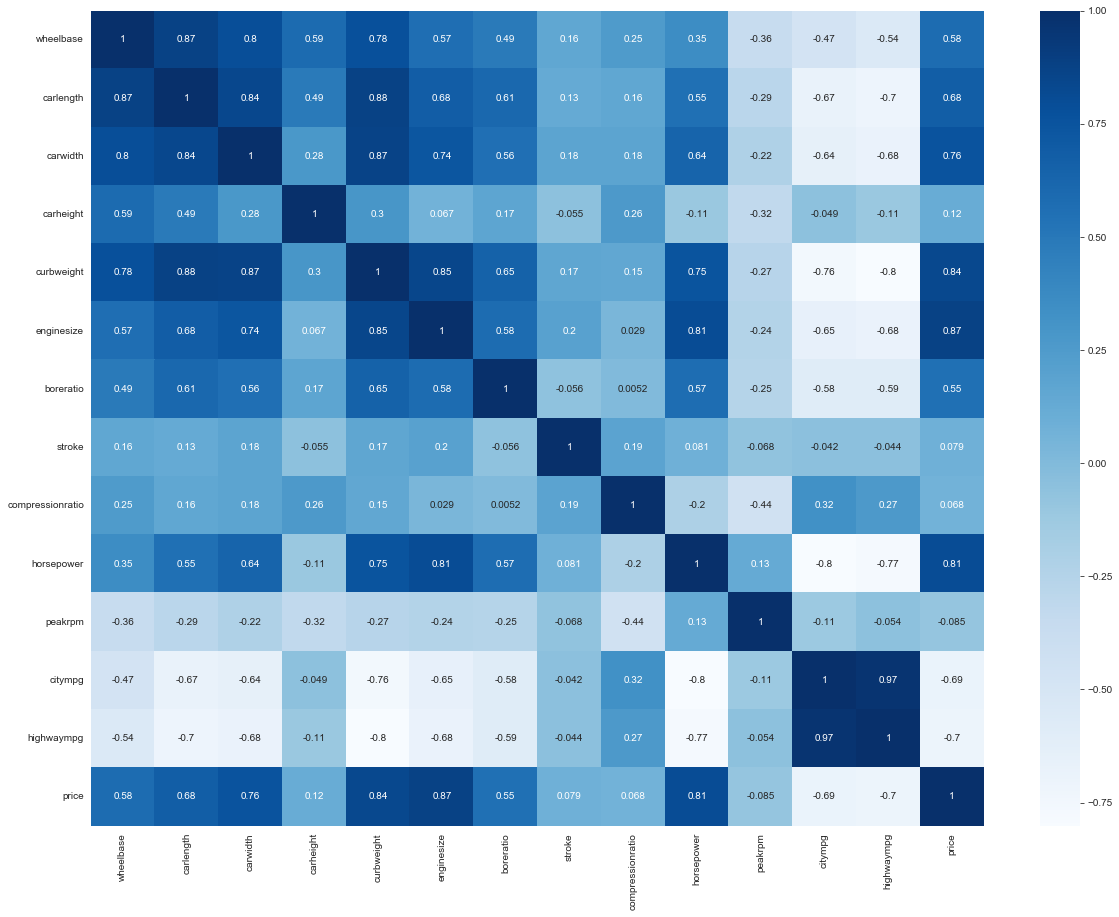

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Heatmaps are great at getting an at-a-glance insight into potential features that might be good predictors for the target `price`

On the positive side, it would appear that the columns `enginesize`, `curbweight`, `carwidth`, and `horsepower` have a highly positive correlation with the target column.

On the negative side,  `highwaympg` and `citympg` are negatively correlated with the price target. This would indicate the as the selling price of the vehicle increases, the efficiency  of the vehicle decreases.

In a similar vein, these two features appear to be potentially multi-correlated, as they measure very similar information. As such, I will likely opt to select only one of them for model training purposes. Perhaps I could train the model with each one individually and measure performance to see which is more predictive.

## Scatterplots For Potentially Informative Features

Text(0.5, 1.0, 'Regplot: Price vs Horsepower')

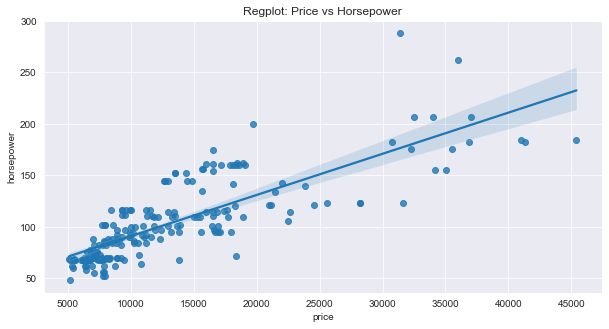

In [18]:
# scatter between horsepower and price
# used regplot to add additional fitted regression line
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='price', y='horsepower')
plt.title('Regplot: Price vs Horsepower')

In [21]:
df.columns

Index(['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

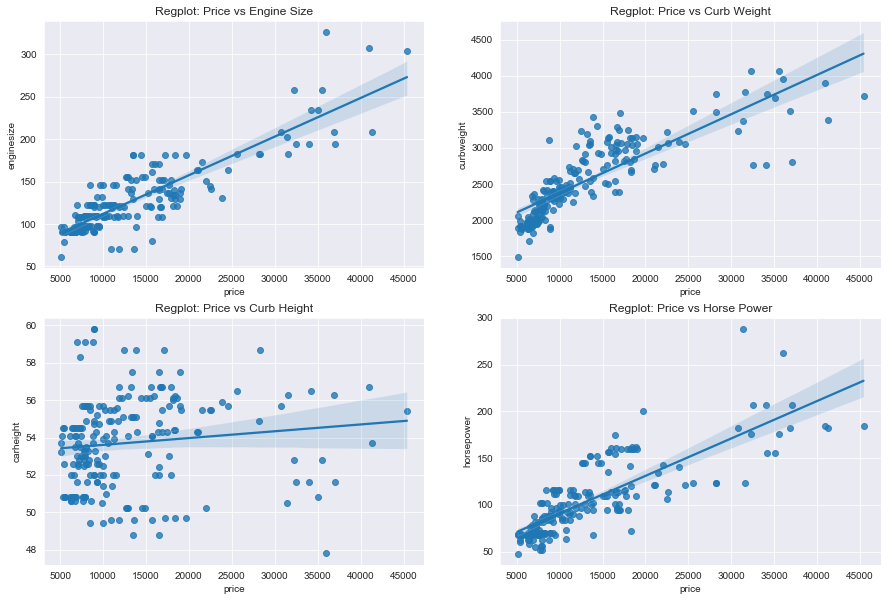

In [25]:
fix, axs = plt.subplots(2, 2, figsize=(15,10))

sns.regplot(data=df, x='price', y='enginesize', ax=axs[0,0])
sns.regplot(data=df, x='price', y='curbweight', ax=axs[0,1])
sns.regplot(data=df, x='price', y='carheight', ax=axs[1,0])
sns.regplot(data=df, x='price', y='horsepower', ax=axs[1,1])

axs[0,0].set_title('Regplot: Price vs Engine Size')
axs[0,1].set_title('Regplot: Price vs Curb Weight')
axs[1,0].set_title('Regplot: Price vs Curb Height')
axs[1,1].set_title('Regplot: Price vs Horse Power')

plt.show()

Taking a look at this scatterplot, the `horsepower` feature appears to have a linear correlation with the target `price`.

It should be noted that as the price increases, the horsepower feature seems to experience more variance.